In [1]:
#tutorial https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
# https://stackoverflow.com/questions/52273543/creating-multiple-boxplots-on-the-same-graph-from-a-dictionary
# https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
from time import sleep
import warnings
import requests
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from bs4 import BeautifulSoup
import os
from scipy.stats import ks_2samp
from scipy import stats
# La directory viene cambiata puntando alla directory padre per raggiungere più facilmente i risultati
os.chdir("..")

Medie con base complessiva

[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Casing'),
 Text(4, 0, 'Missing Value'),
 Text(5, 0, 'Suspect Sign')]

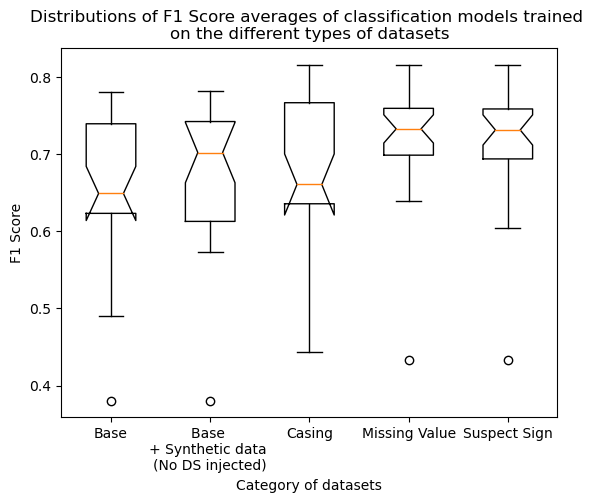

In [2]:

df_plot_base = pd.read_csv("./outputComparisons/Means/General/base.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Means/General/base_synthetic.csv", index_col= False)
df_plot_casing= pd.read_csv("./outputComparisons/Means/General/casing.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Means/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Means/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
#La media, in questo caso, è calcolata su tutti i 5 dataset per i casi base e base_synthetic mentre solo sui 4 a cui sono applicabili per gli scenari con datasmells
dict_df = {"Base" : list(df_plot_base["F1 Score"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["F1 Score"]), "Casing": list(df_plot_casing["F1 Score"]), "Missing Value": list(df_plot_missingvalues["F1 Score"]), "Suspect Sign": list(df_plot_suspectsign["F1 Score"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of F1 Score averages of classification models trained \non the different types of datasets")
box.set_xlabel("Category of datasets")
box.set_ylabel("F1 Score")
box.set_xticklabels(dict_df.keys())

In [3]:
print("F1 Score - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["F1 Score"], df_plot_base_synthetic["F1 Score"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["F1 Score"], df_plot_base_synthetic["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base["F1 Score"], df_plot_casing["F1 Score"]).pvalue < 0.05):
    print("Base vs Casing - pvalue: ", ks_2samp(df_plot_base["F1 Score"], df_plot_casing["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue < 0.05):
    print("Base vs Missing Value - pvalue: ", ks_2samp(df_plot_base["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue < 0.05):
    print("Base vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_casing["F1 Score"]).pvalue < 0.05):
    print("Base+Synthetic vs Casing - pvalue: ", ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_casing["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue < 0.05):
    print("Base+Synthetic vs Missing Value - pvalue: ", ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue < 0.05):
    print("Base+Synthetic vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue)

F1 Score - Differences using Kolmogorov-Smirnov Test
Base vs Missing Value - pvalue:  0.00889018684023524
Base vs Suspect Sign - pvalue:  0.00889018684023524


In [4]:
print(stats.shapiro(df_plot_base["F1 Score"]))
print(stats.shapiro(df_plot_base_synthetic["F1 Score"]))
print(stats.shapiro(df_plot_casing["F1 Score"]))
print(stats.shapiro(df_plot_suspectsign["F1 Score"]))
print(stats.shapiro(df_plot_missingvalues["F1 Score"]))


ShapiroResult(statistic=0.8693759441375732, pvalue=0.0028557495679706335)
ShapiroResult(statistic=0.8542675375938416, pvalue=0.001400708919391036)
ShapiroResult(statistic=0.9015119671821594, pvalue=0.014487449079751968)
ShapiroResult(statistic=0.7905195951461792, pvalue=9.419467096449807e-05)
ShapiroResult(statistic=0.7752189040184021, pvalue=5.246271757641807e-05)


[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Casing'),
 Text(4, 0, 'Missing Value'),
 Text(5, 0, 'Suspect Sign')]

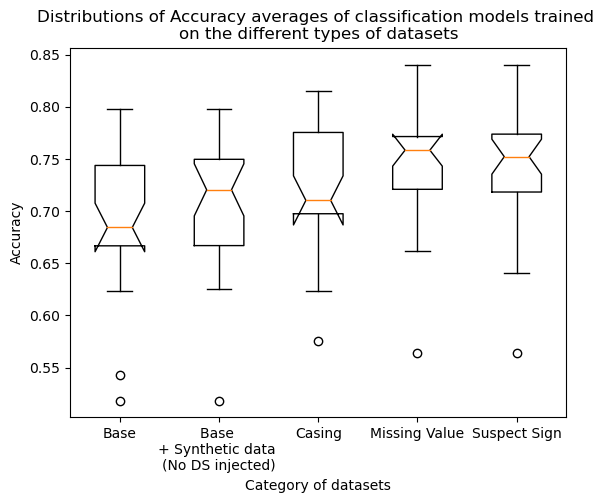

In [5]:

df_plot_base = pd.read_csv("./outputComparisons/Means/General/base.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Means/General/base_synthetic.csv", index_col= False)
df_plot_casing= pd.read_csv("./outputComparisons/Means/General/casing.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Means/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Means/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
#La media, in questo caso, è calcolata su tutti i 5 dataset per i casi base e base_synthetic mentre solo sui 4 a cui sono applicabili per gli scenari con datasmells
dict_df = {"Base" : list(df_plot_base["Accuracy"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["Accuracy"]), "Casing": list(df_plot_casing["Accuracy"]), "Missing Value": list(df_plot_missingvalues["Accuracy"]), "Suspect Sign": list(df_plot_suspectsign["Accuracy"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of Accuracy averages of classification models trained \non the different types of datasets")
box.set_xlabel("Category of datasets")
box.set_ylabel("Accuracy")
box.set_xticklabels(dict_df.keys())

In [6]:
print("Accuracy - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["Accuracy"], df_plot_base_synthetic["Accuracy"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["Accuracy"], df_plot_base_synthetic["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Accuracy"], df_plot_casing["Accuracy"]).pvalue < 0.05):
    print("Base vs Casing - pvalue: ", ks_2samp(df_plot_base["Accuracy"], df_plot_casing["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Accuracy"], df_plot_missingvalues["Accuracy"]).pvalue < 0.05):
    print("Base vs Missing Value - pvalue: ", ks_2samp(df_plot_base["Accuracy"], df_plot_missingvalues["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Accuracy"], df_plot_suspectsign["Accuracy"]).pvalue < 0.05):
    print("Base vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base["Accuracy"], df_plot_suspectsign["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_casing["Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Casing - pvalue: ", ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_casing["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_missingvalues["Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Missing Value - pvalue: ", ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_missingvalues["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_suspectsign["Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_suspectsign["Accuracy"]).pvalue)

Accuracy - Differences using Kolmogorov-Smirnov Test
Base vs Missing Value - pvalue:  0.02166982723648196
Base vs Suspect Sign - pvalue:  0.00333382007458774
Base+Synthetic vs Missing Value - pvalue:  0.00889018684023524
Base+Synthetic vs Suspect Sign - pvalue:  0.02166982723648196


[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Casing'),
 Text(4, 0, 'Missing Value'),
 Text(5, 0, 'Suspect Sign')]

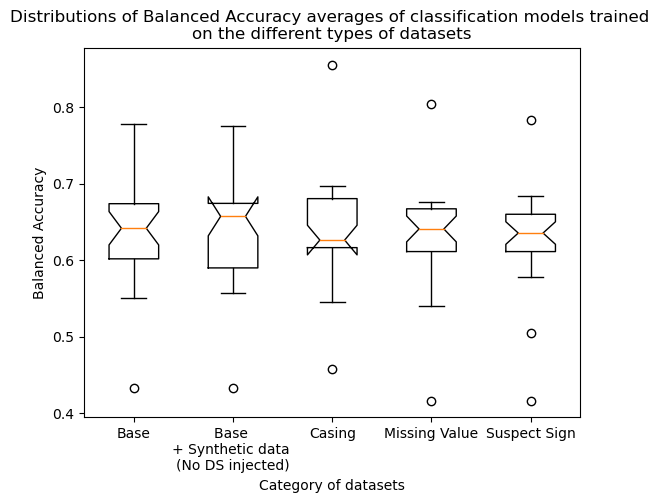

In [7]:

df_plot_base = pd.read_csv("./outputComparisons/Means/General/base.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Means/General/base_synthetic.csv", index_col= False)
df_plot_casing= pd.read_csv("./outputComparisons/Means/General/casing.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Means/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Means/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
#La media, in questo caso, è calcolata su tutti i 5 dataset per i casi base e base_synthetic mentre solo sui 4 a cui sono applicabili per gli scenari con datasmells
dict_df = {"Base" : list(df_plot_base["Balanced Accuracy"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["Balanced Accuracy"]), "Casing": list(df_plot_casing["Balanced Accuracy"]), "Missing Value": list(df_plot_missingvalues["Balanced Accuracy"]), "Suspect Sign": list(df_plot_suspectsign["Balanced Accuracy"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of Balanced Accuracy averages of classification models trained \non the different types of datasets")
box.set_xlabel("Category of datasets")
box.set_ylabel("Balanced Accuracy")
box.set_xticklabels(dict_df.keys())

In [8]:
print("Balanced Accuracy - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_base_synthetic["Balanced Accuracy"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_base_synthetic["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_casing["Balanced Accuracy"]).pvalue < 0.05):
    print("Base vs Casing - pvalue: ", ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_casing["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_missingvalues["Balanced Accuracy"]).pvalue < 0.05):
    print("Base vs Missing Value - pvalue: ", ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_missingvalues["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_suspectsign["Balanced Accuracy"]).pvalue < 0.05):
    print("Base vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_suspectsign["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_casing["Balanced Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Casing - pvalue: ", ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_casing["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_missingvalues["Balanced Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Missing Value - pvalue: ", ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_missingvalues["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_suspectsign["Balanced Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_suspectsign["Balanced Accuracy"]).pvalue)

Balanced Accuracy - Differences using Kolmogorov-Smirnov Test


[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Casing'),
 Text(4, 0, 'Missing Value'),
 Text(5, 0, 'Suspect Sign')]

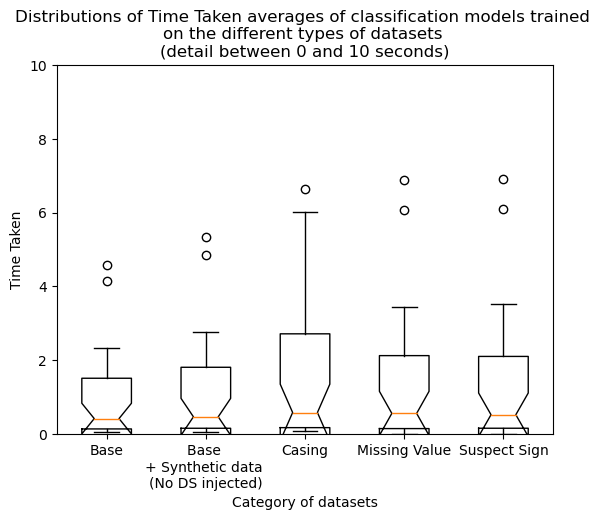

In [9]:

df_plot_base = pd.read_csv("./outputComparisons/Means/General/base.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Means/General/base_synthetic.csv", index_col= False)
df_plot_casing= pd.read_csv("./outputComparisons/Means/General/casing.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Means/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Means/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
#La media, in questo caso, è calcolata su tutti i 5 dataset per i casi base e base_synthetic mentre solo sui 4 a cui sono applicabili per gli scenari con datasmells
dict_df = {"Base" : list(df_plot_base["Time Taken"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["Time Taken"]), "Casing": list(df_plot_casing["Time Taken"]), "Missing Value": list(df_plot_missingvalues["Time Taken"]), "Suspect Sign": list(df_plot_suspectsign["Time Taken"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of Time Taken averages of classification models trained \non the different types of datasets \n(detail between 0 and 10 seconds)")
box.set_xlabel("Category of datasets")
box.set_ylabel("Time Taken")
box.set_ylim(0, 10)
box.set_xticklabels(dict_df.keys())

In [10]:
print("Time Taken - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["Time Taken"], df_plot_base_synthetic["Time Taken"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["Time Taken"], df_plot_base_synthetic["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base["Time Taken"], df_plot_casing["Time Taken"]).pvalue < 0.05):
    print("Base vs Casing - pvalue: ", ks_2samp(df_plot_base["Time Taken"], df_plot_casing["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base["Time Taken"], df_plot_missingvalues["Time Taken"]).pvalue < 0.05):
    print("Base vs Missing Value - pvalue: ", ks_2samp(df_plot_base["Time Taken"], df_plot_missingvalues["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base["Time Taken"], df_plot_suspectsign["Time Taken"]).pvalue < 0.05):
    print("Base vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base["Time Taken"], df_plot_suspectsign["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_casing["Time Taken"]).pvalue < 0.05):
    print("Base+Synthetic vs Casing - pvalue: ", ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_casing["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_missingvalues["Time Taken"]).pvalue < 0.05):
    print("Base+Synthetic vs Missing Value - pvalue: ", ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_missingvalues["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_suspectsign["Time Taken"]).pvalue < 0.05):
    print("Base+Synthetic vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_suspectsign["Time Taken"]).pvalue)

Time Taken - Differences using Kolmogorov-Smirnov Test


Medie tra dataset con feature numeriche

[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Missing Value'),
 Text(4, 0, 'Suspect Sign')]

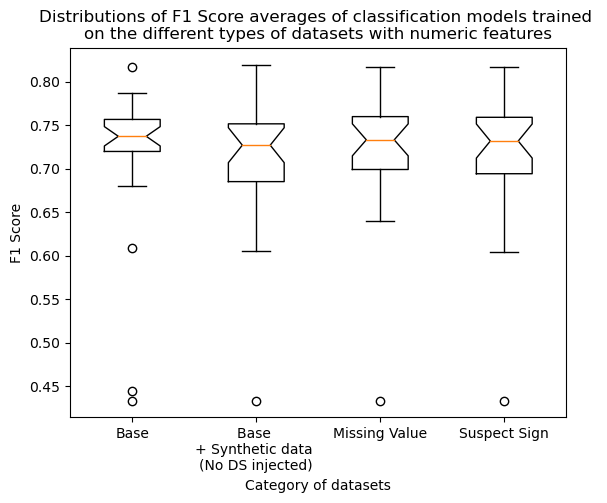

In [11]:
df_plot_base = pd.read_csv("./outputComparisons/Means/General/base_numeric.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Means/General/base_synthetic_numeric.csv", index_col= False)
df_plot_casing= pd.read_csv("./outputComparisons/Means/General/casing.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Means/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Means/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
dict_df = {"Base" : list(df_plot_base["F1 Score"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["F1 Score"]), "Missing Value": list(df_plot_missingvalues["F1 Score"]), "Suspect Sign": list(df_plot_suspectsign["F1 Score"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of F1 Score averages of classification models trained \non the different types of datasets with numeric features")
box.set_xlabel("Category of datasets")
box.set_ylabel("F1 Score")
box.set_xticklabels(dict_df.keys())

In [12]:
print(stats.shapiro(df_plot_base["F1 Score"]))
print(stats.shapiro(df_plot_base_synthetic["F1 Score"]))
print(stats.shapiro(df_plot_suspectsign["F1 Score"]))
print(stats.shapiro(df_plot_missingvalues["F1 Score"]))
#p-value minore di 0.05, ipotesi che abbiano distribuzione normale è rigettata

ShapiroResult(statistic=0.671147346496582, pvalue=1.577316425027675e-06)
ShapiroResult(statistic=0.7979942560195923, pvalue=0.00012637267354875803)
ShapiroResult(statistic=0.7905195951461792, pvalue=9.419467096449807e-05)
ShapiroResult(statistic=0.7752189040184021, pvalue=5.246271757641807e-05)


In [13]:
print("F1 Score - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["F1 Score"], df_plot_base_synthetic["F1 Score"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["F1 Score"], df_plot_base_synthetic["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue < 0.05):
    print("Base vs Missing Value - pvalue: ", ks_2samp(df_plot_base["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue < 0.05):
    print("Base vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue < 0.05):
    print("Base+Synthetic vs Missing Value - pvalue: ", ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue < 0.05):
    print("Base+Synthetic vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue)

F1 Score - Differences using Kolmogorov-Smirnov Test


In [14]:
'''print("F1 Score - Differences using FriedMan test")
if(stats.friedmanchisquare(df_plot_base["F1 Score"], df_plot_base_synthetic["F1 Score"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", stats.friedmanchisquare(df_plot_base["F1 Score"], df_plot_base_synthetic["F1 Score"]).pvalue)
if(stats.friedmanchisquare(df_plot_base["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue < 0.05):
    print("Base vs Missing Value - pvalue: ", stats.friedmanchisquare(df_plot_base["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue)
if(stats.friedmanchisquare(df_plot_base["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue < 0.05):
    print("Base vs Suspect Sign - pvalue: ", stats.friedmanchisquare(df_plot_base["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue)
if(stats.friedmanchisquare(df_plot_base_synthetic["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue < 0.05):
    print("Base+Synthetic vs Missing Value - pvalue: ", stats.friedmanchisquare(df_plot_base_synthetic["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue)
if(stats.friedmanchisquare(df_plot_base_synthetic["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue < 0.05):
    print("Base+Synthetic vs Suspect Sign - pvalue: ", stats.friedmanchisquare(df_plot_base_synthetic["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue)'''

'print("F1 Score - Differences using FriedMan test")\nif(stats.friedmanchisquare(df_plot_base["F1 Score"], df_plot_base_synthetic["F1 Score"]).pvalue < 0.05):\n    print("Base vs Base+Synthetic - pvalue: ", stats.friedmanchisquare(df_plot_base["F1 Score"], df_plot_base_synthetic["F1 Score"]).pvalue)\nif(stats.friedmanchisquare(df_plot_base["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue < 0.05):\n    print("Base vs Missing Value - pvalue: ", stats.friedmanchisquare(df_plot_base["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue)\nif(stats.friedmanchisquare(df_plot_base["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue < 0.05):\n    print("Base vs Suspect Sign - pvalue: ", stats.friedmanchisquare(df_plot_base["F1 Score"], df_plot_suspectsign["F1 Score"]).pvalue)\nif(stats.friedmanchisquare(df_plot_base_synthetic["F1 Score"], df_plot_missingvalues["F1 Score"]).pvalue < 0.05):\n    print("Base+Synthetic vs Missing Value - pvalue: ", stats.friedmanchisquare(df_plot_base_synth

[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Missing Value'),
 Text(4, 0, 'Suspect Sign')]

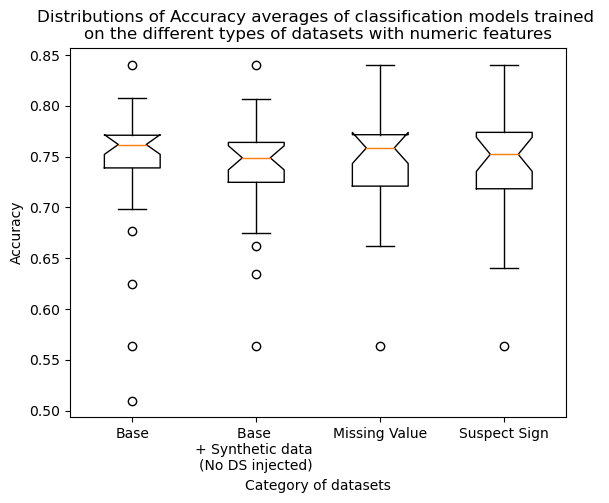

In [15]:
df_plot_base = pd.read_csv("./outputComparisons/Means/General/base_numeric.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Means/General/base_synthetic_numeric.csv", index_col= False)
df_plot_casing= pd.read_csv("./outputComparisons/Means/General/casing.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Means/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Means/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
#Per la media questa è calcolata su tutti i 5 dataset per i casi base e base_synthetic mentre solo sui 4 a cui sono applicabili per gli scenari con datasmells
dict_df = {"Base" : list(df_plot_base["Accuracy"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["Accuracy"]), "Missing Value": list(df_plot_missingvalues["Accuracy"]), "Suspect Sign": list(df_plot_suspectsign["Accuracy"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of Accuracy averages of classification models trained \non the different types of datasets with numeric features")
box.set_xlabel("Category of datasets")
box.set_ylabel("Accuracy")
box.set_xticklabels(dict_df.keys())

In [16]:
print("Accuracy - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["Accuracy"], df_plot_base_synthetic["Accuracy"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["Accuracy"], df_plot_base_synthetic["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Accuracy"], df_plot_missingvalues["Accuracy"]).pvalue < 0.05):
    print("Base vs Missing Value - pvalue: ", ks_2samp(df_plot_base["Accuracy"], df_plot_missingvalues["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Accuracy"], df_plot_suspectsign["Accuracy"]).pvalue < 0.05):
    print("Base vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base["Accuracy"], df_plot_suspectsign["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_missingvalues["Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Missing Value - pvalue: ", ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_missingvalues["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_suspectsign["Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_suspectsign["Accuracy"]).pvalue)

Accuracy - Differences using Kolmogorov-Smirnov Test


[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Missing Value'),
 Text(4, 0, 'Suspect Sign')]

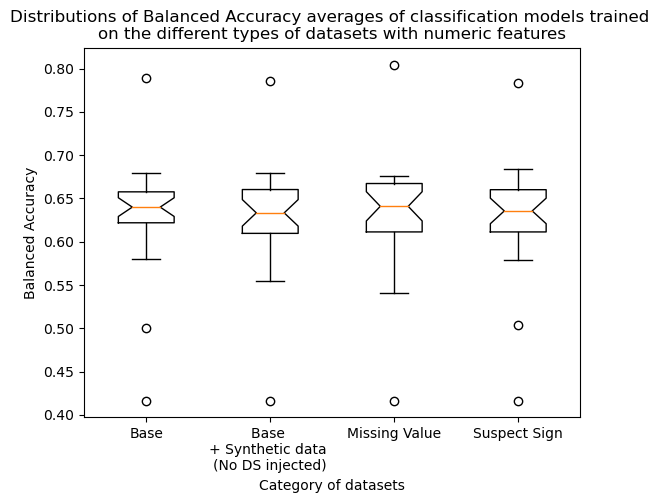

In [17]:
df_plot_base = pd.read_csv("./outputComparisons/Means/General/base_numeric.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Means/General/base_synthetic_numeric.csv", index_col= False)
df_plot_casing= pd.read_csv("./outputComparisons/Means/General/casing.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Means/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Means/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
#Per la media questa è calcolata su tutti i 5 dataset per i casi base e base_synthetic mentre solo sui 4 a cui sono applicabili per gli scenari con datasmells
dict_df = {"Base" : list(df_plot_base["Balanced Accuracy"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["Balanced Accuracy"]), "Missing Value": list(df_plot_missingvalues["Balanced Accuracy"]), "Suspect Sign": list(df_plot_suspectsign["Balanced Accuracy"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of Balanced Accuracy averages of classification models trained \non the different types of datasets with numeric features")
box.set_xlabel("Category of datasets")
box.set_ylabel("Balanced Accuracy")
box.set_xticklabels(dict_df.keys())

In [18]:
print("Balanced Accuracy - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_base_synthetic["Balanced Accuracy"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_base_synthetic["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_missingvalues["Balanced Accuracy"]).pvalue < 0.05):
    print("Base vs Missing Value - pvalue: ", ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_missingvalues["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_suspectsign["Balanced Accuracy"]).pvalue < 0.05):
    print("Base vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_suspectsign["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_missingvalues["Balanced Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Missing Value - pvalue: ", ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_missingvalues["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_suspectsign["Balanced Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_suspectsign["Balanced Accuracy"]).pvalue)

Balanced Accuracy - Differences using Kolmogorov-Smirnov Test


[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Missing Value'),
 Text(4, 0, 'Suspect Sign')]

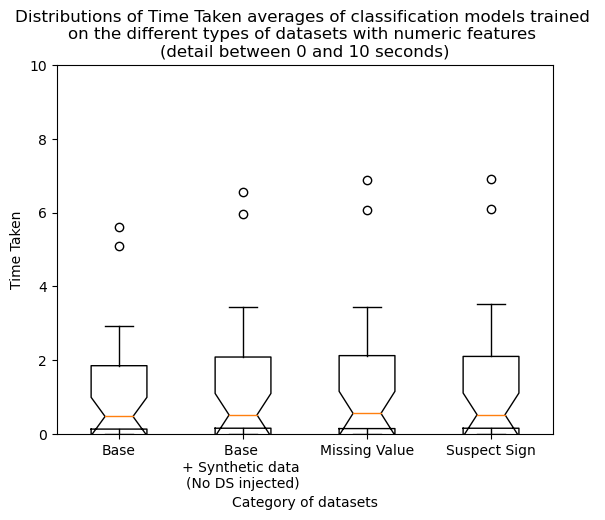

In [19]:
df_plot_base = pd.read_csv("./outputComparisons/Means/General/base_numeric.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Means/General/base_synthetic_numeric.csv", index_col= False)
df_plot_casing= pd.read_csv("./outputComparisons/Means/General/casing.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Means/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Means/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
#Per la media questa è calcolata su tutti i 5 dataset per i casi base e base_synthetic mentre solo sui 4 a cui sono applicabili per gli scenari con datasmells
dict_df = {"Base" : list(df_plot_base["Time Taken"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["Time Taken"]), "Missing Value": list(df_plot_missingvalues["Time Taken"]), "Suspect Sign": list(df_plot_suspectsign["Time Taken"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of Time Taken averages of classification models trained \non the different types of datasets with numeric features \n(detail between 0 and 10 seconds)")
box.set_xlabel("Category of datasets")
box.set_ylabel("Time Taken")
box.set_ylim(0, 10)
box.set_xticklabels(dict_df.keys())

In [20]:
print("Time Taken - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["Time Taken"], df_plot_base_synthetic["Time Taken"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["Time Taken"], df_plot_base_synthetic["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base["Time Taken"], df_plot_missingvalues["Time Taken"]).pvalue < 0.05):
    print("Base vs Missing Value - pvalue: ", ks_2samp(df_plot_base["Time Taken"], df_plot_missingvalues["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base["Time Taken"], df_plot_suspectsign["Time Taken"]).pvalue < 0.05):
    print("Base vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base["Time Taken"], df_plot_suspectsign["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_missingvalues["Time Taken"]).pvalue < 0.05):
    print("Base+Synthetic vs Missing Value - pvalue: ", ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_missingvalues["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_suspectsign["Time Taken"]).pvalue < 0.05):
    print("Base+Synthetic vs Suspect Sign - pvalue: ", ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_suspectsign["Time Taken"]).pvalue)

Time Taken - Differences using Kolmogorov-Smirnov Test


Medie tra dataset con feature categoriche

[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Casing')]

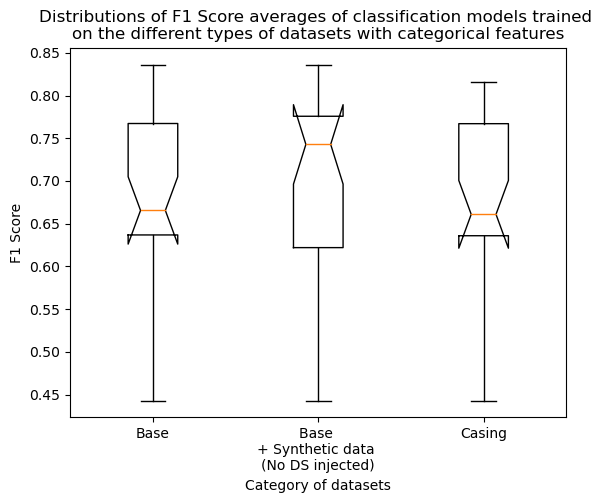

In [21]:
df_plot_base = pd.read_csv("./outputComparisons/Means/General/base_casing.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Means/General/base_synthetic_casing.csv", index_col= False)
df_plot_casing= pd.read_csv("./outputComparisons/Means/General/casing.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Means/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Means/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
#Per la media questa è calcolata su tutti i 5 dataset per i casi base e base_synthetic mentre solo sui 4 a cui sono applicabili per gli scenari con datasmells
dict_df = {"Base" : list(df_plot_base["F1 Score"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["F1 Score"]), "Casing": list(df_plot_casing["F1 Score"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of F1 Score averages of classification models trained \non the different types of datasets with categorical features")
box.set_xlabel("Category of datasets")
box.set_ylabel("F1 Score")
box.set_xticklabels(dict_df.keys())

In [22]:
print(stats.shapiro(df_plot_base["F1 Score"]))
print(stats.shapiro(df_plot_base_synthetic["F1 Score"]))
print(stats.shapiro(df_plot_casing["F1 Score"]))
#p-value minore di 0.05, ipotesi che abbiano distribuzione normale è rigettata

ShapiroResult(statistic=0.8836204409599304, pvalue=0.005756771191954613)
ShapiroResult(statistic=0.8688547611236572, pvalue=0.0027849595062434673)
ShapiroResult(statistic=0.9015119671821594, pvalue=0.014487449079751968)


In [23]:
print("F1 Score - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["F1 Score"], df_plot_base_synthetic["F1 Score"]).pvalue < 0.05):
    print("Base vs Base+Synthetic: ", ks_2samp(df_plot_base["F1 Score"], df_plot_base_synthetic["F1 Score"]))
    print("Base:\n",df_plot_base["F1 Score"].describe())
    print("Base Synthetic:\n", df_plot_base_synthetic["F1 Score"].describe())
if(ks_2samp(df_plot_base["F1 Score"], df_plot_casing["F1 Score"]).pvalue < 0.05):
    print("Base vs Casing - pvalue: ", ks_2samp(df_plot_base["F1 Score"], df_plot_casing["F1 Score"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_casing["F1 Score"]).pvalue < 0.05):
    print("Base+Synthetic vs Casing: ", ks_2samp(df_plot_base_synthetic["F1 Score"], df_plot_casing["F1 Score"]))
    print("Base Synthetic:\n",df_plot_base_synthetic["F1 Score"].describe())
    print("Casing:\n",df_plot_casing["F1 Score"].describe())

F1 Score - Differences using Kolmogorov-Smirnov Test


[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Casing')]

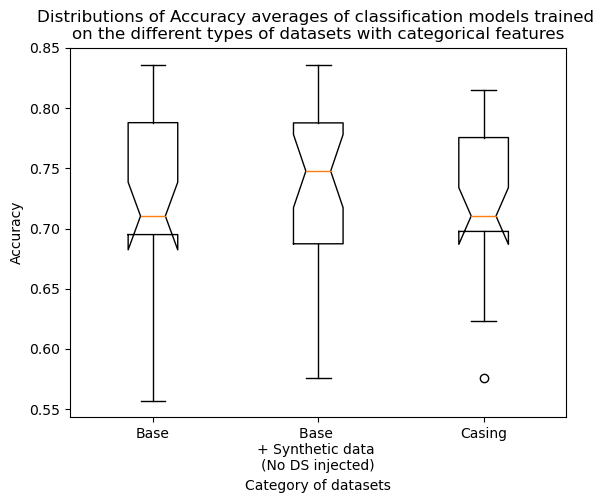

In [24]:
df_plot_base = pd.read_csv("./outputComparisons/Means/General/base_casing.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Means/General/base_synthetic_casing.csv", index_col= False)
df_plot_casing= pd.read_csv("./outputComparisons/Means/General/casing.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Means/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Means/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
#Per la media questa è calcolata su tutti i 5 dataset per i casi base e base_synthetic mentre solo sui 4 a cui sono applicabili per gli scenari con datasmells
dict_df = {"Base" : list(df_plot_base["Accuracy"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["Accuracy"]), "Casing": list(df_plot_casing["Accuracy"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of Accuracy averages of classification models trained \non the different types of datasets with categorical features")
box.set_xlabel("Category of datasets")
box.set_ylabel("Accuracy")
box.set_xticklabels(dict_df.keys())

In [25]:
print("Accuracy - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["Accuracy"], df_plot_base_synthetic["Accuracy"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["Accuracy"], df_plot_base_synthetic["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Accuracy"], df_plot_casing["Accuracy"]).pvalue < 0.05):
    print("Base vs Casing - pvalue: ", ks_2samp(df_plot_base["Accuracy"], df_plot_casing["Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_casing["Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Casing: ", ks_2samp(df_plot_base_synthetic["Accuracy"], df_plot_casing["Accuracy"]))
    print("Base Synthetic:\n",df_plot_base_synthetic["Accuracy"].describe())
    print("Casing:\n",df_plot_casing["Accuracy"].describe())

Accuracy - Differences using Kolmogorov-Smirnov Test


[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Casing')]

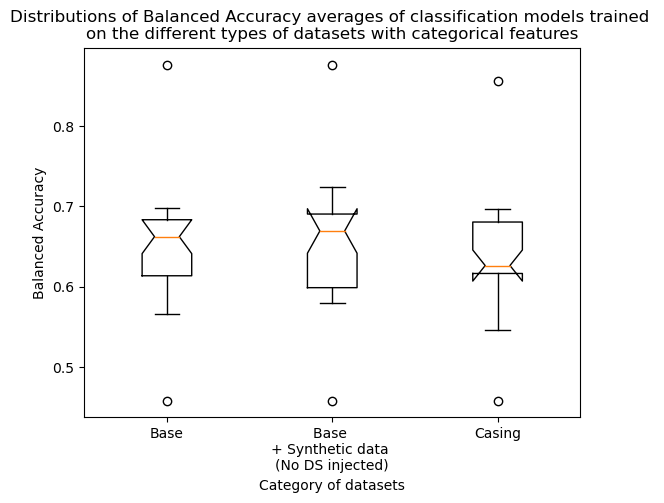

In [26]:
df_plot_base = pd.read_csv("./outputComparisons/Means/General/base_casing.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Means/General/base_synthetic_casing.csv", index_col= False)
df_plot_casing= pd.read_csv("./outputComparisons/Means/General/casing.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Means/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Means/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
#Per la media questa è calcolata su tutti i 5 dataset per i casi base e base_synthetic mentre solo sui 4 a cui sono applicabili per gli scenari con datasmells
dict_df = {"Base" : list(df_plot_base["Balanced Accuracy"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["Balanced Accuracy"]), "Casing": list(df_plot_casing["Balanced Accuracy"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of Balanced Accuracy averages of classification models trained \non the different types of datasets with categorical features")
box.set_xlabel("Category of datasets")
box.set_ylabel("Balanced Accuracy")
box.set_xticklabels(dict_df.keys())

In [27]:
print("Balanced Accuracy - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_base_synthetic["Balanced Accuracy"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_base_synthetic["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_casing["Balanced Accuracy"]).pvalue < 0.05):
    print("Base vs Casing - pvalue: ", ks_2samp(df_plot_base["Balanced Accuracy"], df_plot_casing["Balanced Accuracy"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_casing["Balanced Accuracy"]).pvalue < 0.05):
    print("Base+Synthetic vs Casing - pvalue: ", ks_2samp(df_plot_base_synthetic["Balanced Accuracy"], df_plot_casing["Balanced Accuracy"]).pvalue)

Balanced Accuracy - Differences using Kolmogorov-Smirnov Test


[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Casing')]

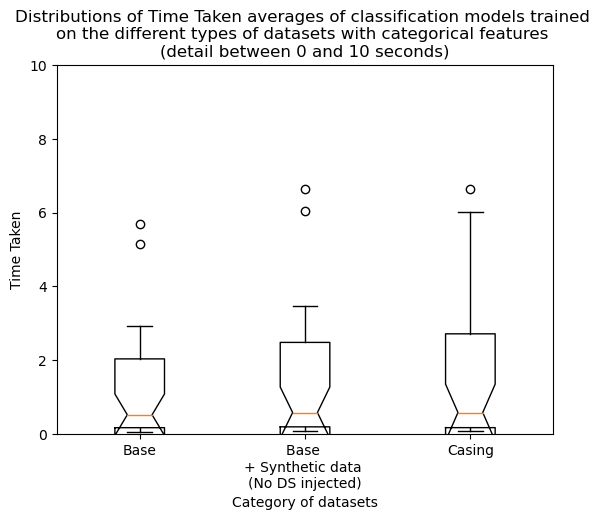

In [28]:
df_plot_base = pd.read_csv("./outputComparisons/Means/General/base_casing.csv", index_col= False)
df_plot_base_synthetic = pd.read_csv("./outputComparisons/Means/General/base_synthetic_casing.csv", index_col= False)
df_plot_casing= pd.read_csv("./outputComparisons/Means/General/casing.csv", index_col= False)
df_plot_missingvalues= pd.read_csv("./outputComparisons/Means/General/missing_values.csv", index_col= False)
df_plot_suspectsign = pd.read_csv("./outputComparisons/Means/General/suspect_sign.csv", index_col= False)
df_plot_floatingpoint = pd.read_csv("./outputLazyPredict/FloatingPointNumberAsString/df_m_1/df_m_1_1.csv", index_col= False)
#Per la media questa è calcolata su tutti i 5 dataset per i casi base e base_synthetic mentre solo sui 4 a cui sono applicabili per gli scenari con datasmells
dict_df = {"Base" : list(df_plot_base["Time Taken"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["Time Taken"]), "Casing": list(df_plot_casing["Time Taken"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of Time Taken averages of classification models trained \non the different types of datasets with categorical features \n(detail between 0 and 10 seconds)")
box.set_xlabel("Category of datasets")
box.set_ylabel("Time Taken")
box.set_ylim(0, 10)
box.set_xticklabels(dict_df.keys())

In [29]:
print("Time Taken - Differences using Kolmogorov-Smirnov Test")
if(ks_2samp(df_plot_base["Time Taken"], df_plot_base_synthetic["Time Taken"]).pvalue < 0.05):
    print("Base vs Base+Synthetic - pvalue: ", ks_2samp(df_plot_base["Time Taken"], df_plot_base_synthetic["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base["Time Taken"], df_plot_casing["Time Taken"]).pvalue < 0.05):
    print("Base vs Casing - pvalue: ", ks_2samp(df_plot_base["Time Taken"], df_plot_casing["Time Taken"]).pvalue)
if(ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_casing["Time Taken"]).pvalue < 0.05):
    print("Base+Synthetic vs Casing - pvalue: ", ks_2samp(df_plot_base_synthetic["Time Taken"], df_plot_casing["Time Taken"]).pvalue)

Time Taken - Differences using Kolmogorov-Smirnov Test


[Text(1, 0, 'Base'),
 Text(2, 0, 'Base \n+ Synthetic data \n(No DS injected)'),
 Text(3, 0, 'Casing'),
 Text(4, 0, 'Missing Value'),
 Text(5, 0, 'Suspect Sign')]

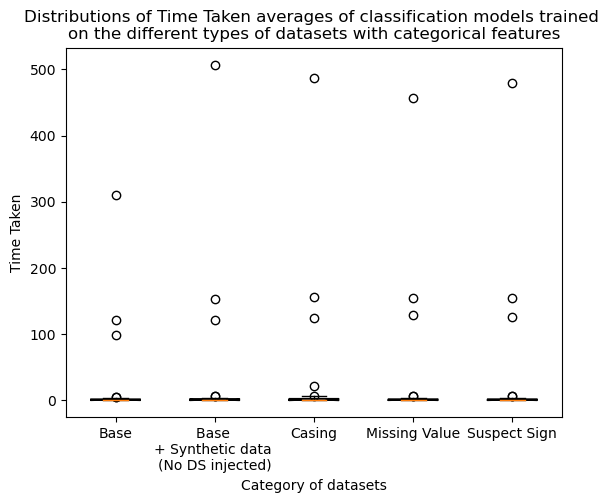

In [30]:
dict_df = {"Base" : list(df_plot_base["Time Taken"]), "Base \n+ Synthetic data \n(No DS injected)": list(df_plot_base_synthetic["Time Taken"]), "Casing": list(df_plot_casing["Time Taken"]), "Missing Value": list(df_plot_missingvalues["Time Taken"]), "Suspect Sign": list(df_plot_suspectsign["Time Taken"])}

_, box = plt.subplots()
box.boxplot(dict_df.values(), 1)
box.set_title("Distributions of Time Taken averages of classification models trained \non the different types of datasets with categorical features")
box.set_xlabel("Category of datasets")
box.set_ylabel("Time Taken")
box.set_xticklabels(dict_df.keys())